/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


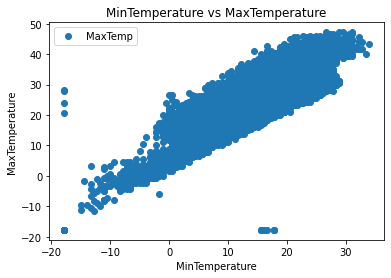

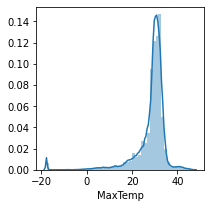

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as pl  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

dataset = pd.read_csv('dataset_values.csv')
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
pl.title('MinTemperature vs MaxTemperature')  
pl.xlabel('MinTemperature')  
pl.ylabel('MaxTemperature')  
pl.show()
pl.figure(figsize=(3,3))
pl.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [3]:
print(regressor.intercept_)
print(regressor.coef_) 

[9.70563356]
[[0.94399232]]


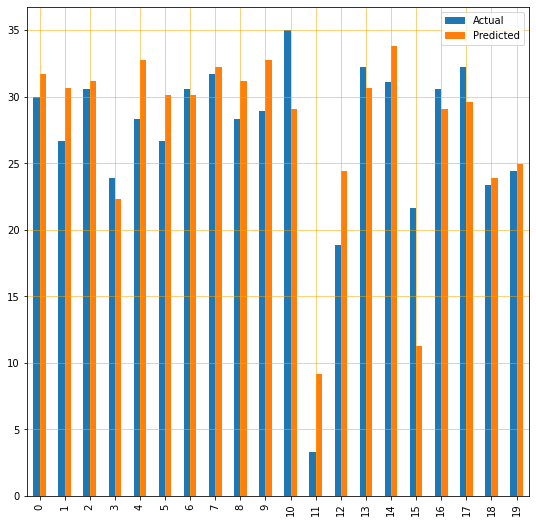

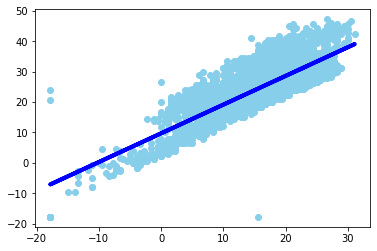

Mean absolute error: 2.835
Mean equared error: 13.664
Root mean squared error: 3.6964


In [8]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(20)
df1.plot(kind='bar',figsize=(9,9))
pl.grid(which='major', linestyle='-', linewidth='0.5', color='orange')
pl.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
pl.show()
pl.scatter(X_test, y_test,  color='skyblue')
pl.plot(X_test, y_pred, color='blue', linewidth=4)
pl.show()

print('Mean absolute error:', round(metrics.mean_absolute_error(y_test, y_pred),3))  
print('Mean equared error:', round(metrics.mean_squared_error(y_test, y_pred),3))  
print('Root mean squared error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4))